In [4]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

# FashionMNIST

In [5]:
# load dataset
fashion_mnist_train_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
fashion_mnist_val_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

fashion_mnist_train_loader = torch.utils.data.DataLoader(fashion_mnist_train_dataset, batch_size=64, shuffle=True, pin_memory=True)
fashion_mnist_test_loader = torch.utils.data.DataLoader(fashion_mnist_val_dataset, batch_size=64, shuffle=True, pin_memory=True)
fashion_mnist_weights_dir = 'weights/FashionMNIST'
fashion_mnist_history_dir = 'histories/FashionMNIST'

os.makedirs(fashion_mnist_weights_dir, exist_ok=True)
os.makedirs(fashion_mnist_history_dir, exist_ok=True)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
patience = 5
# device = torch.device("cpu")

# Autoencoder
model_name = 'AE_1'
model = BasicAutoencoder((1, 28, 28), 32, [256]).to(device)
print(torchinfo.summary(model, input_size=(1, 1, 28, 28)))

opt = torch.optim.Adam(model.parameters())
loss_fn = MSELoss()

history = train(model, device, fashion_mnist_train_loader, fashion_mnist_test_loader, opt, loss_fn, 50, model_name, fashion_mnist_weights_dir, patience, 1e-4)
history.to_csv(os.path.join(fashion_mnist_history_dir, f'{model_name}.history.csv'))

# Deep autoencoder
model_name = 'AE_2'
model = BasicAutoencoder((1, 28, 28), 32, [512, 256]).to(device)
print(torchinfo.summary(model, input_size=(1, 1, 28, 28)))

opt = torch.optim.Adam(model.parameters())
loss_fn = MSELoss()

history = train(model, device, fashion_mnist_train_loader, fashion_mnist_test_loader, opt, loss_fn, 50, model_name, fashion_mnist_weights_dir, patience, 1e-4)
history.to_csv(os.path.join(fashion_mnist_history_dir, f'{model_name}.history.csv'))

# Variadic autoencoder
model_name = 'VAE'
model = VariadicAE((1, 28, 28), 32, [512]).to(device)
print(torchinfo.summary(model, input_size=(1, 1, 28, 28)))

opt = torch.optim.Adam(model.parameters())
loss_fn = BetaKLDivLoss()

history = train(model, device, fashion_mnist_train_loader, fashion_mnist_test_loader, opt, loss_fn, 50, model_name, fashion_mnist_weights_dir, patience, 1e-2)
history.to_csv(os.path.join(fashion_mnist_history_dir, f'{model_name}.history.csv'))


Layer (type:depth-idx)                   Output Shape              Param #
BasicAutoencoder                         [1, 1, 28, 28]            --
├─Flatten: 1-1                           [1, 784]                  --
├─Sequential: 1-2                        [1, 256]                  --
│    └─Linear: 2-1                       [1, 256]                  200,960
│    └─ReLU: 2-2                         [1, 256]                  --
├─Linear: 1-3                            [1, 32]                   8,224
├─Sequential: 1-4                        [1, 784]                  --
│    └─Linear: 2-3                       [1, 256]                  8,448
│    └─ReLU: 2-4                         [1, 256]                  --
│    └─Linear: 2-5                       [1, 784]                  201,488
│    └─Sigmoid: 2-6                      [1, 784]                  --
├─Unflatten: 1-5                         [1, 1, 28, 28]            --
Total params: 419,120
Trainable params: 419,120
Non-trainable params:

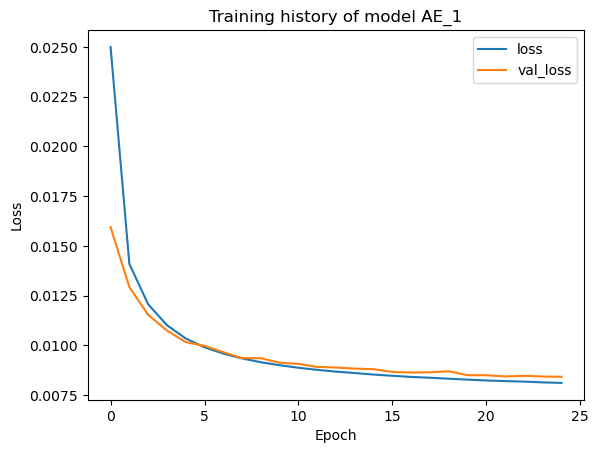

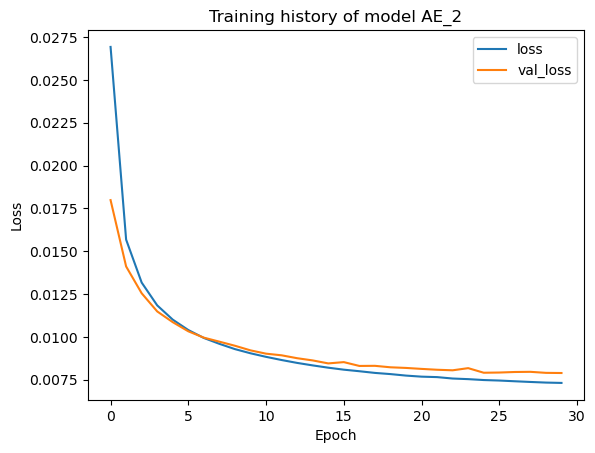

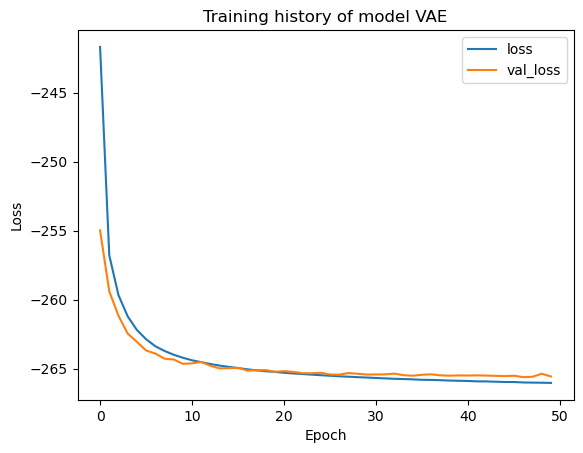

In [7]:
plot_history('AE_1', fashion_mnist_history_dir)
plot_history('AE_2', fashion_mnist_history_dir)
plot_history('VAE', fashion_mnist_history_dir)

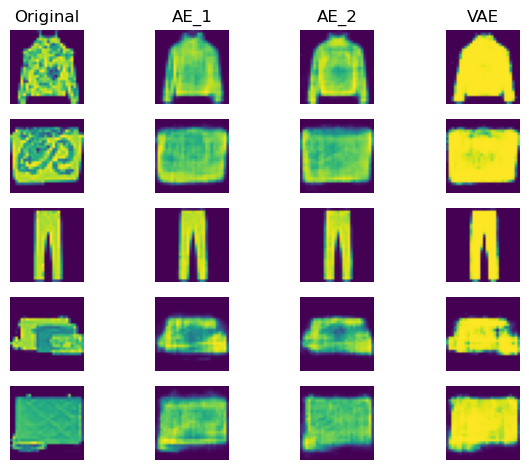

In [8]:
test_batch = next(iter(fashion_mnist_test_loader))[0][:5]
models = load_models('AE_1', 'AE_2', 'VAE', kind='final', model_dir=fashion_mnist_weights_dir)
show_examples(test_batch, models)

# CIFAR10

In [9]:
# load dataset
cifar10_train_dataset = torchvision.datasets.CIFAR10(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
cifar10_val_dataset = torchvision.datasets.CIFAR10(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

cifar10_train_loader = torch.utils.data.DataLoader(cifar10_train_dataset, batch_size=64, shuffle=True, pin_memory=True)
cifar10_test_loader = torch.utils.data.DataLoader(cifar10_val_dataset, batch_size=64, shuffle=True, pin_memory=True)
cifar10_weights_dir = 'weights/CIFAR10'
cifar10_history_dir = 'histories/CIFAR10'

os.makedirs(cifar10_weights_dir, exist_ok=True)
os.makedirs(cifar10_history_dir, exist_ok=True)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
patience = 5
epsilon = 1e-3
inp = (3, 32, 32)

# Autoencoder
model_name = 'AE_1'
model = BasicAutoencoder(inp, 64, [256]).to(device)
print(torchinfo.summary(model, input_size=(1, *inp)))

opt = torch.optim.Adam(model.parameters())
loss_fn = MSELoss()

history = train(model, device, cifar10_train_loader, cifar10_test_loader, opt, loss_fn, 50, model_name, cifar10_weights_dir, patience, 1e-4)
history.to_csv(os.path.join(cifar10_history_dir, f'{model_name}.history.csv'))

# Deep autoencoder
model_name = 'AE_2'
model = BasicAutoencoder(inp, 64, [512, 256]).to(device)
print(torchinfo.summary(model, input_size=(1, *inp)))

opt = torch.optim.Adam(model.parameters())
loss_fn = MSELoss()

history = train(model, device, cifar10_train_loader, cifar10_test_loader, opt, loss_fn, 50, model_name, cifar10_weights_dir, patience, 1e-4)
history.to_csv(os.path.join(cifar10_history_dir, f'{model_name}.history.csv'))

# Variadic autoencoder
model_name = 'VAE'
model = VariadicAE(inp, 64, [512]).to(device)
print(torchinfo.summary(model, input_size=(1, *inp)))

opt = torch.optim.Adam(model.parameters())
loss_fn = BetaKLDivLoss()

history = train(model, device, cifar10_train_loader, cifar10_test_loader, opt, loss_fn, 50, model_name, cifar10_weights_dir, patience, 1e-2)
history.to_csv(os.path.join(cifar10_history_dir, f'{model_name}.history.csv'))


Layer (type:depth-idx)                   Output Shape              Param #
BasicAutoencoder                         [1, 3, 32, 32]            --
├─Flatten: 1-1                           [1, 3072]                 --
├─Sequential: 1-2                        [1, 256]                  --
│    └─Linear: 2-1                       [1, 256]                  786,688
│    └─ReLU: 2-2                         [1, 256]                  --
├─Linear: 1-3                            [1, 64]                   16,448
├─Sequential: 1-4                        [1, 3072]                 --
│    └─Linear: 2-3                       [1, 256]                  16,640
│    └─ReLU: 2-4                         [1, 256]                  --
│    └─Linear: 2-5                       [1, 3072]                 789,504
│    └─Sigmoid: 2-6                      [1, 3072]                 --
├─Unflatten: 1-5                         [1, 3, 32, 32]            --
Total params: 1,609,280
Trainable params: 1,609,280
Non-trainable p

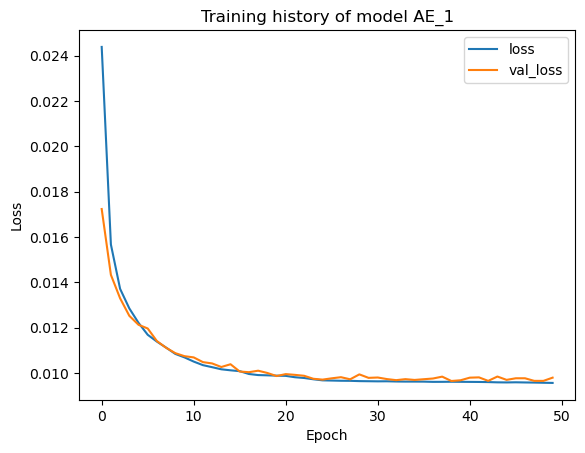

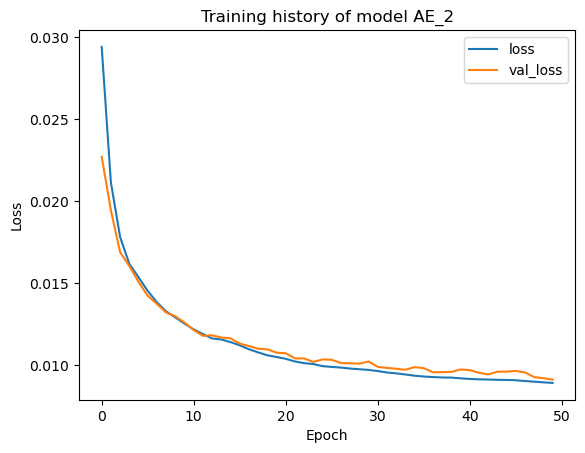

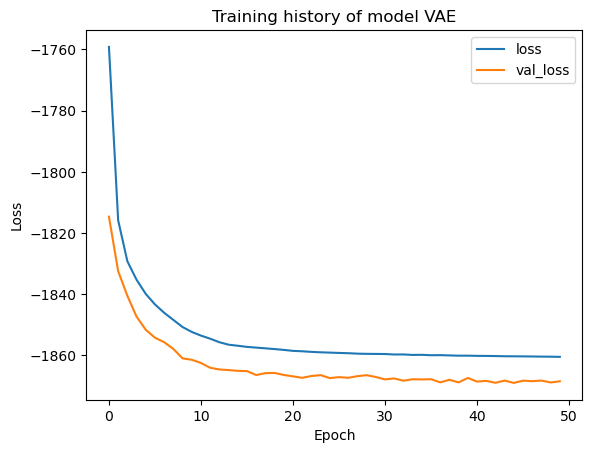

In [11]:
plot_history('AE_1', cifar10_history_dir)
plot_history('AE_2', cifar10_history_dir)
plot_history('VAE', cifar10_history_dir)

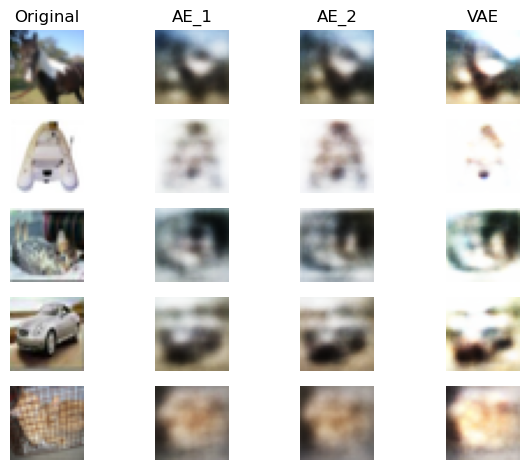

In [12]:
test_batch = next(iter(cifar10_test_loader))[0][:5]
models = load_models('AE_1', 'AE_2', 'VAE', kind='final', model_dir=cifar10_weights_dir)
show_examples(test_batch, models)